In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [37]:
def czytajS(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        data = data.T
        return data

In [38]:
def czytajU(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        return data

In [39]:
folder = ''
nazwy = ["u_at_5000", "wart_S"]

for n in nazwy :
    plik = f'{n}.txt'
    sciezka = os.path.join(folder, plik)
    if os.path.exists(sciezka):
        print(f"Otwieranie {plik}")
        if n == "u_at_5000" :
            u500 = czytajU(sciezka)
        if n == "wart_S" :
            wartS1 = czytajS(sciezka)
    else:
        print(f"nie istnieje.")

Otwieranie u_at_5000.txt
Otwieranie wart_S.txt


In [40]:
u500 = u500.T

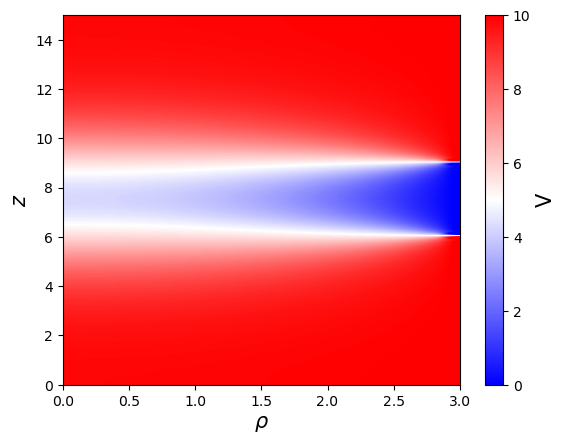

In [46]:
fs = 15
# plt.figure(figsize=(10,10))
plt.imshow(u500, cmap='bwr', interpolation='spline36', extent=[0, 3, 0, 15], aspect = 'auto')
plt.colorbar(label='U').set_label('V', fontsize=fs)
# plt.axis('equal')
plt.xlabel(r"$\rho$", fontsize = fs)
plt.ylabel(r"$z$", fontsize = fs)
# plt.title(f'b) 500it', fontsize = fs)
plt.show()

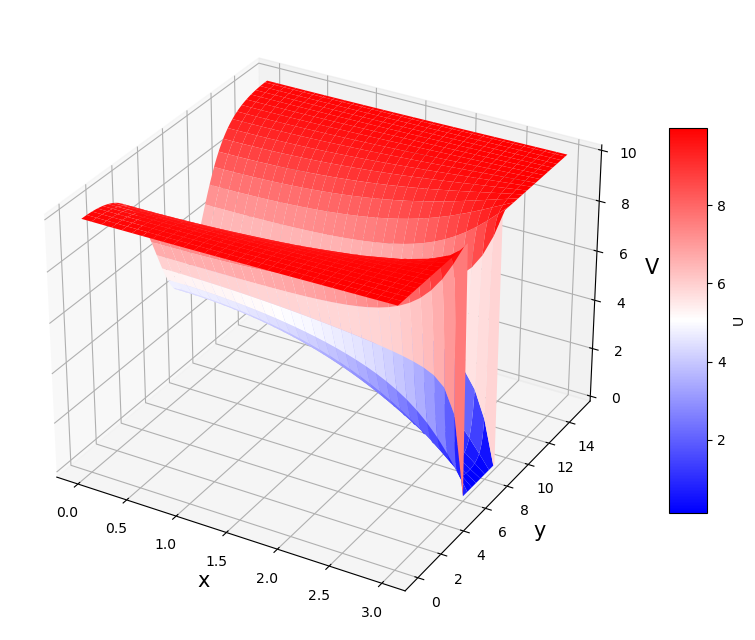

In [47]:
ny, nx = u500.shape
x = np.linspace(0, 3, nx)
y = np.linspace(0, 15, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, u500, cmap='bwr', edgecolor='none')

ax.set_xlabel('x', fontsize=fs)
ax.set_ylabel('y', fontsize=fs)
ax.set_zlabel('V', fontsize=fs)
# ax.set_title('b) 500it', fontsize=fs)

fig.colorbar(surf, shrink=0.5, aspect=10, label='U')

plt.show()

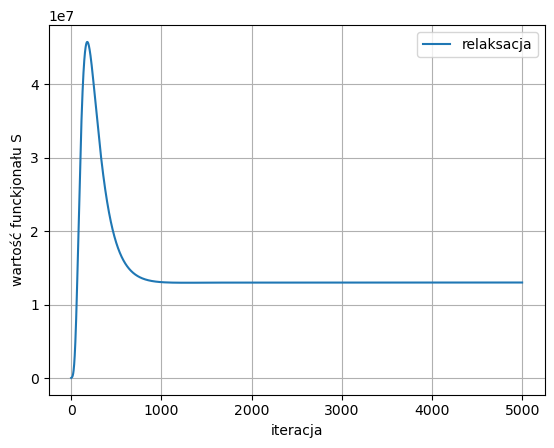

In [59]:
plt.plot(wartS1[0], wartS1[1], '-', label = "relaksacja")
plt.legend(loc='upper right')           
plt.xlabel("iteracja", fontsize = fs-5)
plt.ylabel("wartość funckjonału S", fontsize = fs-5)
plt.grid()
plt.show()

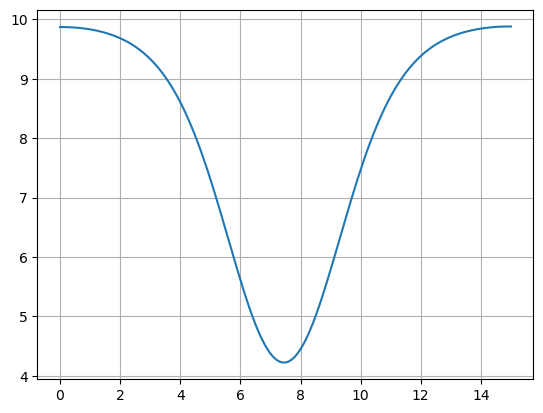

In [60]:
oSym = u500.T[0]
zSym = np.linspace(0, 15, oSym.size)
plt.plot(zSym, oSym)
plt.grid()
plt.show()

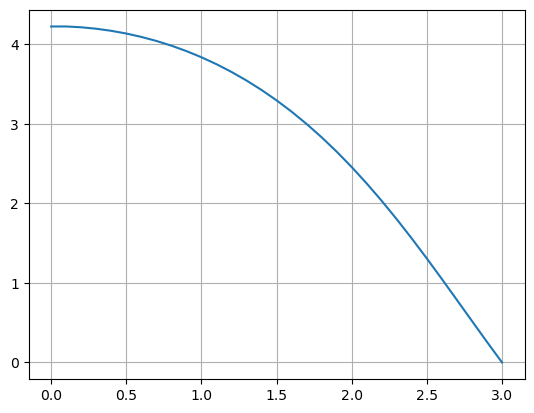

In [61]:
uZp = u500[75]
roZp = np.linspace(0, 3, uZp.size)
plt.plot(roZp, uZp)
plt.grid()
plt.show()